# Tarea 3
Autores:
- Hernán Francisco Díaz Farías
- María Angélica Parra Mendoza
- Loreto Constanza Zavala Gaete


En el dataset incluido en el sitio web, usted encontrará unas variables asociadas a distintas medidas correspondientes a dos tipos de arroces de Turquía, especie Osmacik y especie Cammeo. Dentro de las variables encontrará las siguientes variables:
- Area: Corresponde al número de pixeles dentro del grano de arroz
- Perimeter: Corresponde a la distancia recorrida por los pixeles del contorno del grano de arroz
- Major_Axis_Length: Corresponde al eje mayor de la elipse (el grano es una elipse en si)
- Minor_Axis_Length: Corresponde al eje menor de la elipse o grano.
- Eccentricity: Corresponde a una medida de qué tan redondo es el grano
- Convex_Area: Conteo de pixeles de la envoltura convexa mínima del grano
- Extent: Corresponde a la relación de la región formada por el grano y el bounding box asociado en la imagen.
- Class: Cammeo u Osmancik.

Con lo anterior, realice lo siguiente:
## 1. Realice una exploración de datos para ver qué datos existen, cuales de ellos entregan información relevante para el problema y cuales no, eliminación (si corresponde) de datos nulos y duplicados, entre otros.
### 1.1 Importar librerías

In [40]:
from scipy.io.arff import loadarff
import pandas as pd
from skimpy import skim
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
## from lightgbm import LGBMClassifier
## from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import plotly.express as px
RANDOM_STATE = 2024

### 1.2 Cargar datos

In [2]:
data = loadarff('../data/Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data[0])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


### 1.3 Exploración de datos
Podemos observar que el dataset contiene 7 variables y una variable de clase.
Revisaremos y limpiaremos la variable clase.


<Axes: xlabel='Class'>

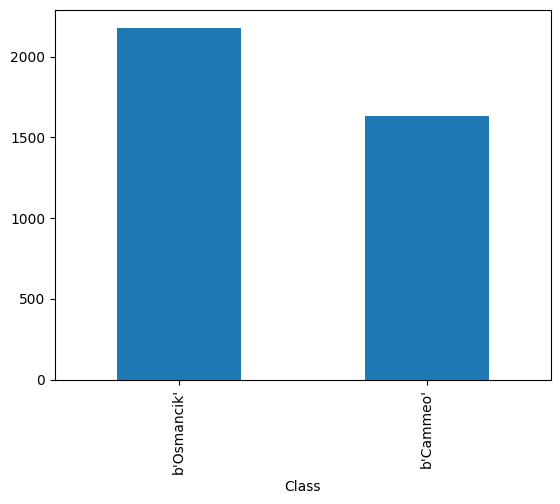

In [3]:
df['Class'].value_counts().plot(kind='bar')

La variable clase sufre de un leve desbalance, aunque no es significativo. Se convertirá con **labelencoder**.

In [4]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


In [5]:
le.classes_

array([b'Cammeo', b'Osmancik'], dtype=object)

La variable clase ha sido convertida a valores numéricos, donde 0 corresponde a Cammeo y 1 a Osmancik.

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3810   │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Area                │   0 │     0 │   12670 │    1732 │   7551 │  11370 │  12420 │  13950 │ 18910 │  ▅▇▅▂  │  │
│ │ Perimeter           │   0 │     0 │   454.2 │    35.6 │  359.1 │  426.1 │  448.9 │  483.7 │ 548.4 │  ▅▇▅▅▁ │  │
│ │ Major_Axis_Length   │   0 │     0 │   188.8 │   17.45 │  145.3 │  174.4 │  185.8 │  203.6 │   239 │ ▁▇▇▇▅  │  │
│ │ Minor_Axis_Length   │   0 │     0 │   86.31 │    5.73 │  59.53 │  82.73 │  86.43 │  90.14 │ 107.5 │  ▁▃▇▂  │  │
│ │ Eccentricity        │   0 │     0 │  0.8869 │ 0.02082 │ 0.7772 │ 0.8724 │ 0.8891 │ 0.9026 │ 0.948 │   ▂▇▇▁ │  │
│ │ Convex_Area         │   0 │     0 │   12950 │    1777 │   7723 │  11630 │  12710 │  14280 │ 19100 │  ▅▇▅▂  │  │
│ │ Extent              │   0 │     0 │  0.6619 │ 0.07724 │ 0.4974 │ 0.5989 │ 0.6454 │ 0.7266 │ 0.861 │ ▁▇▆▅▅▁ │  │
│ │ Class               │   0 │     0 │  0.5722 │  0.4948 │      0 │      0 │      1 │      1 │     1 │ ▆    ▇ │  │
│ └─────────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Al usar skim, podemos observar que:
- No existen valores nulos
- Los rangos de las variables son distintos, por lo que se deberá estandarizar.
- Las variables son numéricas, por lo que no es necesario realizar más transformaciones por el momento.

## 2. Seleccione las variables que utilizará para realizar la modelación, y con ello determine el modelo a utilizar. Realice la modelación correspondiente y reporte métricas de desempeño del modelo.
### 2.1 Selección de variables mediante análisis de variabilidad con ANOVA

In [7]:
X = df.drop(columns='Class')
y = df['Class']
f_classif(X, y)

anova = pd.DataFrame({'Variable': X.columns, 'F': f_classif(X, y)[0], 'p-value': f_classif(X, y)[1]})
anova.sort_values(by='F', ascending=False)

,Variable,F,p-value
2,Major_Axis_Length,8292.132060,0.000000e+00
1,Perimeter,7089.384674,0.000000e+00
5,Convex_Area,4908.672315,0.000000e+00
0,Area,4790.119949,0.000000e+00
4,Eccentricity,2021.961901,0.000000e+00
3,Minor_Axis_Length,605.345502,3.556885e-124
6,Extent,53.519198,3.106619e-13


Al realizar un análisis de varianza, podemos observar que las variables:
- Major_Axis_Length
- Perimeter
- Convex_Area
- Area
- Eccentricity

Son las variables más significativas para el modelo. Se trabajará con estas variables.

In [8]:
X_selected = X[['Major_Axis_Length', 'Perimeter', 'Convex_Area', 'Area', 'Eccentricity']]

### 2.2 Modelación
#### 2.2.1 División de datos

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=2024)

#### 2.2.2 Escalamiento de datos

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.2.2 Entrenamiento y evaluación de modelos

Lista de modelos de clasificación a evaluar:

In [20]:
ensamblados = [
        ("svc", SVC(random_state=RANDOM_STATE)),
        ("log_reg", LogisticRegression(random_state=RANDOM_STATE)),
        ("XGBoost", XGBClassifier()),
    ]

stack_classifier = StackingClassifier(estimators=ensamblados, final_estimator=RandomForestClassifier())
voting_classifier = VotingClassifier(estimators=ensamblados, voting='hard')
bagging_classifier = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=RANDOM_STATE)

modelos = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "SVM": SVC(random_state=RANDOM_STATE),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(),
    'Stacking': stack_classifier,
    'Voting': voting_classifier,
    'Bagging': bagging_classifier,
}



Entrenar y evaluar modelos:


In [21]:
# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Model: {nombre}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       317
           1       0.93      0.92      0.93       445

    accuracy                           0.91       762
   macro avg       0.91      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762

------------------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       317
           1       0.93      0.93      0.93       445

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762

------------------------------------------------------------
Model: KNN
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       317
           1       0.92      0.92      0.92       445

    accurac

In [30]:
# Curva ROC
best_auc = 0
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    if auc > best_auc:
        best_auc = auc
        best_model = nombre
    px.line(x=fpr, y=tpr, title=f"ROC Curve - {nombre} - AUC: {auc}").show()
print(f"Best AUC: {best_auc} - Best Model: {best_model}")


Best AUC: 0.9169425442172048 - Best Model: Stacking


Podemos observar que el modelo de StackingClassifier es el que mejor desempeño tiene, con un AUC de 0.9169.
Por lo tanto, se realizará una optimización de hiperparámetros para el modelo de **StackingClassifier**.

## 3.Realice una optimización de hiper-parámetros para obtener un mejor desempeño del modelo. Para este punto, las métricas de desempeño reportadas en el punto anterior deben mejorar.

Para hacer finetuning de un modelo de emsamblado, se debe realizar una optimización de hiperparámetros de cada modelo base y del modelo final. Por la cantidad de hipermarámetros, se realizará una búsqueda con RandomizedSearchCV, ya que GridSearchCV es muy costoso computacionalmente y tomaría alrededor de 9 horas en ejecutarse.
Este proceso realizará una búsqueda aleatoria de combinaciones de hiperparámetros, evaluando cada combinación con validación cruzada.

In [38]:
parametros = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['rbf', 'poly','sigmoid'],
    'svc__gamma': [0.1, 1, 2],
    'log_reg__C': [0.1, 1, 10],
    'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'XGBoost__n_estimators': [50, 100, 150],
    'XGBoost__max_depth': [3, 5, 7],
    'XGBoost__learning_rate': [0.1, 0.01, 0.001],
    'final_estimator__n_estimators': [50, 100, 150],
    'final_estimator__max_depth': [3, 5, 7, 9]
}

A continuación, se realizará la optimización de hiperparámetros.

In [66]:
grid = RandomizedSearchCV(estimator=stack_classifier, param_distributions=parametros, n_iter=100, cv=5, n_jobs=-1, random_state=RANDOM_STATE, refit=True)
grid.fit(X_train, y_train)
print(f"Best Score: {grid.best_score_}")
print(f"Best Params: {grid.best_params_}")

Best Score: 0.9334011682683249
Best Params: {'svc__kernel': 'rbf', 'svc__gamma': 2, 'svc__C': 10, 'log_reg__solver': 'newton-cg', 'log_reg__C': 10, 'final_estimator__n_estimators': 150, 'final_estimator__max_depth': 3, 'XGBoost__n_estimators': 150, 'XGBoost__max_depth': 3, 'XGBoost__learning_rate': 0.1}


In [67]:
y_pred = grid.predict(X_test)
print(f"Model: StackingClassifier")
print(classification_report(y_test, y_pred))
print("-" * 60)
print(confusion_matrix(y_test, y_pred))
print("-" * 60)


Model: StackingClassifier
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       317
           1       0.93      0.93      0.93       445

    accuracy                           0.92       762
   macro avg       0.91      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762

------------------------------------------------------------
[[284  33]
 [ 31 414]]
------------------------------------------------------------


In [68]:
best_params = grid.best_params_
XGBoost = XGBClassifier(
    n_estimators=best_params['XGBoost__n_estimators'],
    max_depth=best_params['XGBoost__max_depth'],
    learning_rate=best_params['XGBoost__learning_rate'])

svc = SVC(
    C=best_params['svc__C'],
    gamma=best_params['svc__gamma'],
    kernel=best_params['svc__kernel'],
    random_state=RANDOM_STATE)

log_reg = LogisticRegression(
    C=best_params['log_reg__C'],
    solver=best_params['log_reg__solver'],
    random_state=RANDOM_STATE)

best_ensamble = [
    ("svc", svc),
    ("log_reg", log_reg),
    ("XGBoost", XGBoost),
]
best_stack_classifier = StackingClassifier(
    estimators=best_ensamble,
    final_estimator=RandomForestClassifier(
        n_estimators=best_params['final_estimator__n_estimators'],
        max_depth=best_params['final_estimator__max_depth'],
        random_state=RANDOM_STATE)
)
best_stack_classifier.fit(X_train, y_train)
y_pred = best_stack_classifier.predict(X_test)
print(f"Model: StackingClassifier")
print(classification_report(y_test, y_pred))
print("-" * 60)
print(confusion_matrix(y_test, y_pred))
print("-" * 60)
print

Model: StackingClassifier
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       317
           1       0.93      0.93      0.93       445

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762

------------------------------------------------------------
[[286  31]
 [ 30 415]]
------------------------------------------------------------


<function print>

In [69]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
px.line(x=fpr, y=tpr, title=f"ROC Curve - StackingClassifier - AUC: {auc}").show()
print(f"AUC: {auc}")
print(f"Best Params: {best_params}")

AUC: 0.9173962357778327
Best Params: {'svc__kernel': 'rbf', 'svc__gamma': 2, 'svc__C': 10, 'log_reg__solver': 'newton-cg', 'log_reg__C': 10, 'final_estimator__n_estimators': 150, 'final_estimator__max_depth': 3, 'XGBoost__n_estimators': 150, 'XGBoost__max_depth': 3, 'XGBoost__learning_rate': 0.1}


## 4.Entregue un reporte de métricas de su modelo final, matriz de confusión y conclusiones sobre lo obtenido. ¿Cree que su modelo es un buen modelo? Comente.